# Personal EDA Basic Study1 by using data analytics libraries to prepare data science competition

### Key : #DataFrame, #seaborn, #mpg_data, #tips_data
- With my friend Sangmin Ga in Bigdata-Processing LAB of Sogang Univ


### Processing MissingValue in "mpg dataset" and "tips datatset"

In [19]:
import seaborn as sns
import pandas as pd

In [3]:
# 자동차 연비 예측용 데이터
mpg = sns.load_dataset('mpg')

In [4]:
tips = sns.load_dataset('tips')

In [5]:
mpg.info()
# 오브젝트는 문자열이다. 
# 놓친 데이터가 3번에 6개가 있다. 
# 여기서 0번이 타켓 데이터 이다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### * Check missing value

In [6]:
# dataframe.isna() : 데이터프레임에 결측치 존재하는지 확인 <중요>
mpg.isna().sum()
# mpg.horsepower.isna().sum() 도 가능(=특정 컬럼만 확인)

# 즉, 놓친 데이터 몇개 ?

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
# 앞서 확인한 6개의 결측치가 뭔지 확인하기 <중요>
mpg[mpg.horsepower.isna()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


#### * Missing Value 처리를 위한 라이브러리 설치

In [ ]:
!pip install -U missingno

In [8]:
import missingno as mino

In [9]:
dir(mino)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

<AxesSubplot:>

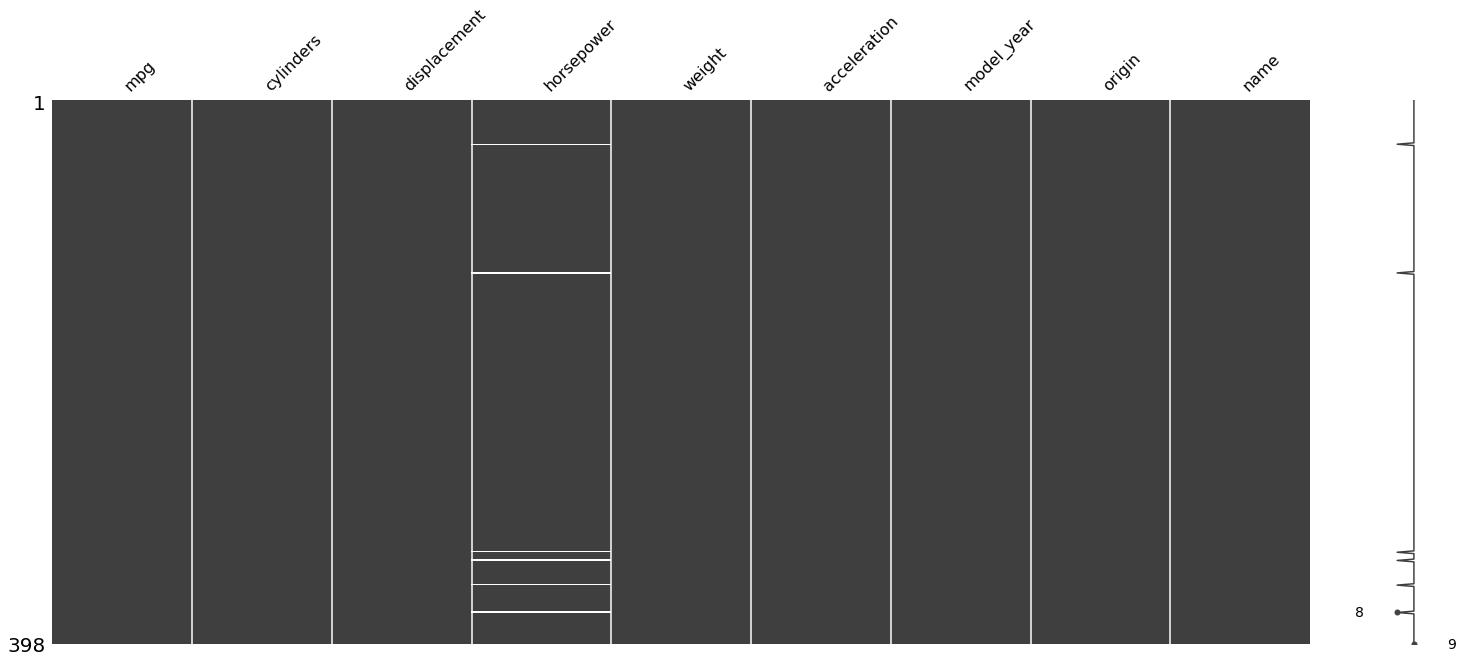

In [10]:
# 앞서 확인한 mpg[mpg.horsepower.isna()] 를 표로 시각화
mino.matrix(mpg)

<AxesSubplot:>

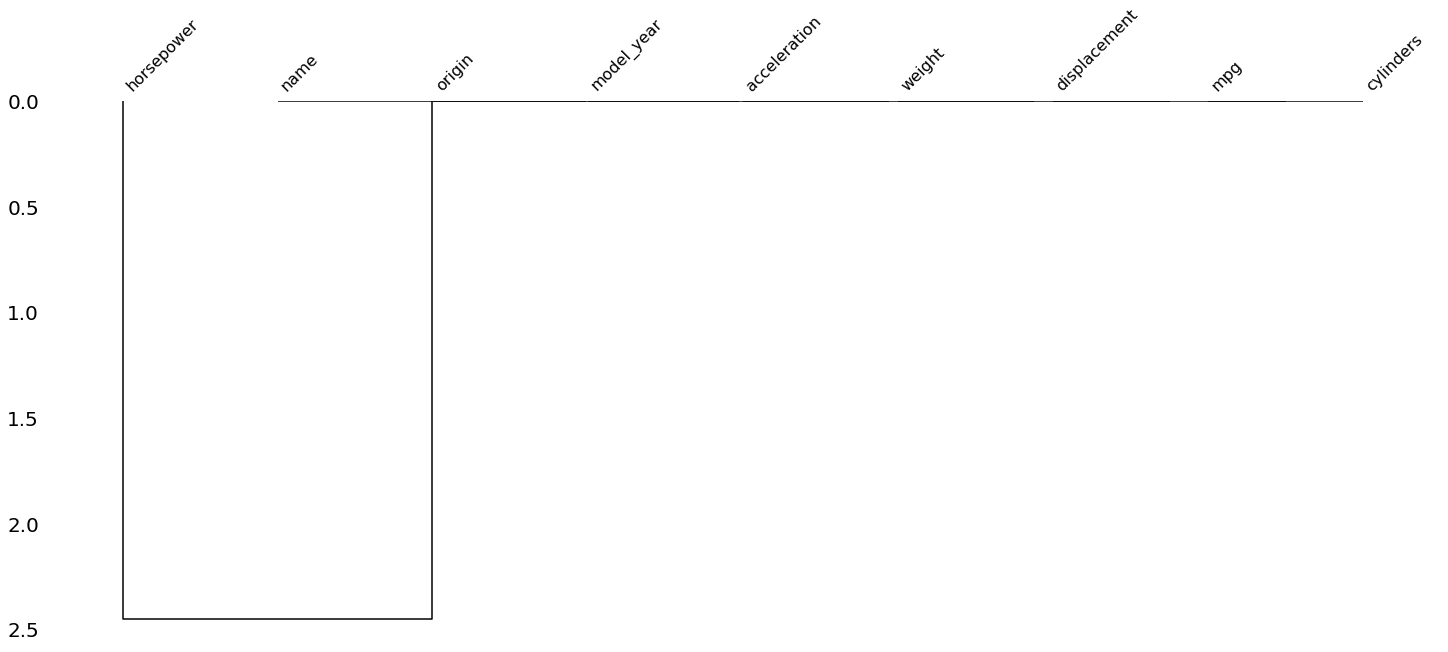

In [11]:
mino.dendrogram(mpg)

In [12]:
# Data Type이 'object'인 컬럼만 확인
'''
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
'''
mpg.describe(include='object')

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [14]:
mpg.origin

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

In [26]:
# 유일한 값 찾기(=중복 제거)
pd.unique(mpg.origin)

array(['usa', 'japan', 'europe'], dtype=object)

In [27]:
# 유일한 값별로 개수 세기
pd.value_counts(mpg.origin)

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [29]:
pd.value_counts(mpg.name)

ford pinto                  6
amc matador                 5
ford maverick               5
toyota corolla              5
chevrolet impala            4
                           ..
volkswagen 411 (sw)         1
nissan stanza xe            1
toyota corolla 1600 (sw)    1
buick century luxus (sw)    1
mercury marquis brougham    1
Name: name, Length: 305, dtype: int64

<AxesSubplot:>

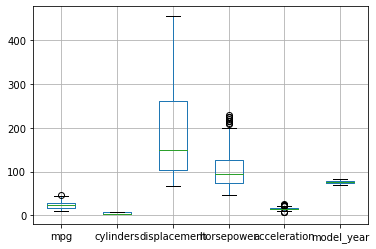

In [30]:
# weight column을 제외하고 box plotting
mpg.loc[:, mpg.columns!='weight'].boxplot()
# -> 넘파이로 만들어져 있는 판다스 이기에 가능하다. 


#### *상관관계 분석 : correlation()  <중요>
- 상관 계수 값의 범위는 −1부터 +1까지이며, 계수의 절대값이 클수록 두 변수간의 관계는 높다
- 계수의 절대값이 작다고 해서 그 가치가 중요하지 않다고 말할 수 없으므로, 자료를 버리는 것보다 다양한 분석기법을 적용하자
---
- 양(+)의 상관관계
    * 한 변수가 증가함에 따라 다른 변수도 증가
- 음(-)의 상관관계
    * 한 변수가 증가함에 따라 다른 변수는 감소

In [41]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


#### *상관관계 분석 : pairplotting
- mpg와 acceleration가 비교적 낮은 수치를 보이는데 아래 표를 보면 뚜렷한 상관관계가 있다고 보기가 애매함을 알 수 있음 <중요>

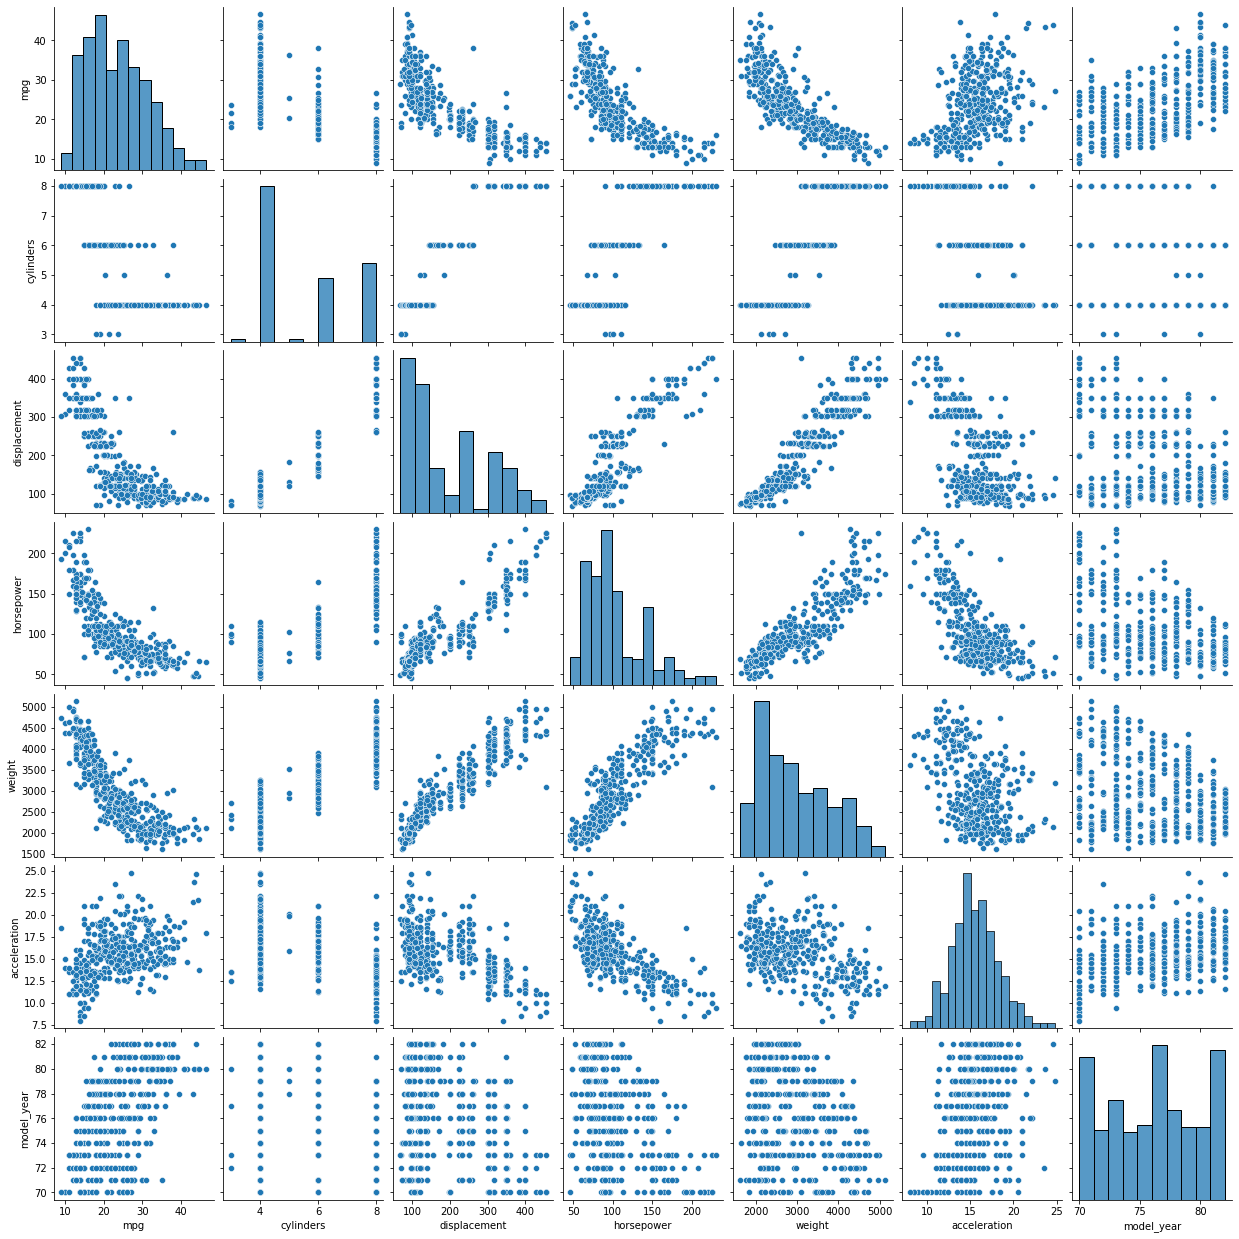

In [40]:
sns.pairplot(mpg.select_dtypes(['int64', 'float64']))

#### *상관관계 분석 : heatmap() <중요>
- 앞서 correlation() 결과를 seaborn의 heatmap()을 활용하여 시각화

<AxesSubplot:>

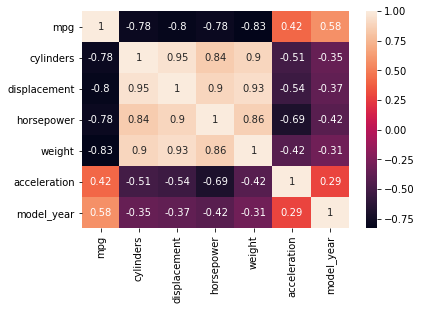

In [43]:
sns.heatmap(mpg.corr(), annot=True)

'''
# 독립이기에 순서를 변경해도 상관이 없다. 
# 컬럼 순서 바뀐다고 데이터 모델 성능이 바뀌는건 안되니깐, 성능이 바뀌는 경우가 컬럼끼리 의존할때, 시계열, 이미지 컬럼, 순서에 따라 중요 해진다. 
# 머신러닝에서는 성능이 바뀌면 안된다. 
'''